In [102]:
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt 
import glob
import re
import cv2
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
! pip freeze > requirements.txt

In [147]:
X = []
y = []
for img in glob.glob('./datasets/hard/*.jpg'):
    face = cv2.cvtColor(cv2.imread(img), cv2.COLOR_RGB2GRAY)
    face = face.reshape(face.size)
    label = img[img.find('\\')+1:img.find('-')]
    X.append(face)
    y.append(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
pca = PCA(n_components=100)
pca.fit(X)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [149]:
classifier = LogisticRegression()
#classifier = MLPClassifier(activation='logistic', solver='lbfgs')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier.score(X_test, y_test))
confusion_matrix(y_test, y_pred)

0.880952380952


array([[5, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 3, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

[[202 202 202 ...,  13  14  14]]
[[  5.14553532e+02  -2.41980072e+03  -2.28555068e+02   6.73041867e+02
    6.88456294e+02   4.96159390e+02   1.12600394e+03  -1.78997052e+02
    5.94604671e+02  -4.61762850e+01   6.24612557e+01   3.93918490e+02
    8.67334773e+02   1.11956129e+02  -8.44992521e+02  -6.49743677e+01
    3.03177525e+02   2.28517604e+02   3.95303499e+00  -1.17610256e+02
   -2.86988823e+02   1.65657591e+01   2.27589970e+02   1.80882759e+02
    5.58516287e+01   5.63973704e+01   3.69469114e+02  -5.94013287e+02
    4.29507125e+02   1.97879447e+00  -1.19063213e+02   8.20152300e+02
    1.89632582e+02   3.55631174e+01  -6.56220641e+01  -4.32278275e+02
    1.09666515e+02  -4.01210872e+02  -3.55566109e+02  -7.54812593e+00
    1.18934471e+02   2.99947132e+02  -1.92791356e+02  -2.05233504e+02
    1.80708896e+02   4.14681944e+02  -6.57810722e+02   9.99694767e+01
    1.23720523e+02   3.39309460e+02  -1.29054182e+02  -1.05818131e+01
    1.69892162e+02  -1.42706522e+02   4.59095623e+02   5.

array(['41'],
      dtype='<U2')

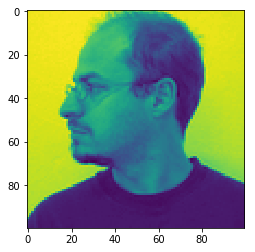

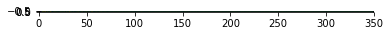

In [101]:
img = cv2.cvtColor(cv2.imread('./datasets/hard/6-01.jpg'), cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img)
img = img.reshape(img.size)
data = img.reshape(1,-1)
print(data)
data = pca.transform(data)
print(data)
plt.figure()
#plt.imshow(data.reshape(10,10))
plt.imshow(data)
classifier.predict(data)